In [28]:
import numpy as np
import pandas as pd
import joblib

In [2]:
df=pd.read_csv("E:\Machine Learning\Fish-weight-prediction\Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
x=df.drop(['Weight','Species'],axis=1)
y=df.drop(['Species','Length1','Length2','Length3','Height','Width'],axis=1)

In [8]:
x

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [9]:
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


In [10]:
# train split sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   x, y, test_size=0.20, random_state=42)

In [11]:
X_train

,Length1,Length2,Length3,Height,Width
75,15.0,16.2,17.2,4.5924,2.6316
138,43.2,46.0,48.7,7.7920,4.8700
2,23.9,26.5,31.1,12.3778,4.6961
86,20.0,22.0,23.5,6.1100,3.4075
45,20.5,22.5,25.3,7.0334,3.8203
...,...,...,...,...,...
71,24.0,26.0,29.0,11.3680,4.2340
106,25.9,28.0,29.4,7.8204,4.2042
14,29.4,32.0,37.2,14.9544,5.1708
92,20.5,22.5,24.0,6.7920,3.6240


In [12]:
X_test

,Length1,Length2,Length3,Height,Width
78,16.8,18.7,19.4,5.1992,3.1234
155,11.7,12.4,13.5,2.4300,1.2690
128,30.0,32.3,34.8,5.5680,3.3756
55,23.6,26.0,28.7,8.3804,4.2476
94,21.0,23.0,24.5,5.2185,3.6260
29,33.5,37.0,42.6,18.9570,6.6030
147,10.1,10.6,11.6,1.7284,1.1484
51,23.6,25.2,27.9,7.0866,3.9060
98,22.6,24.6,26.2,6.7334,4.1658
141,52.0,56.0,59.7,10.6863,6.9849


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
# crossvalidate 
from sklearn.model_selection import cross_val_score

In [62]:
regression=LinearRegression()
pred_model=regression.fit(X_train,y_train)

In [63]:
mse=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error", cv=5)

In [64]:
np.mean(mse)

-17068.55311569634

In [65]:
reg_pred=regression.predict(X_test)

In [66]:
reg_pred

array([[  77.68563317],
       [-159.12460639],
       [ 385.1673549 ],
       [ 300.26119445],
       [ 179.41023158],
       [ 775.66726232],
       [-214.43415538],
       [ 274.90963757],
       [ 268.44510975],
       [1116.01153223],
       [ 610.12007978],
       [ 786.34393233],
       [ 585.01831604],
       [ 172.12366335],
       [ 652.8595541 ],
       [ 785.41425179],
       [ 926.40448191],
       [ 351.83433222],
       [ 256.32442006],
       [ 587.20219745],
       [-175.74829352],
       [ 619.14709502],
       [ 516.45091187],
       [ 515.98797368],
       [ 788.64695281],
       [ 909.00622172],
       [ 219.68134027],
       [ 305.35126984],
       [-237.80116525],
       [-178.93943304],
       [ 688.57820552],
       [  23.23863135]])

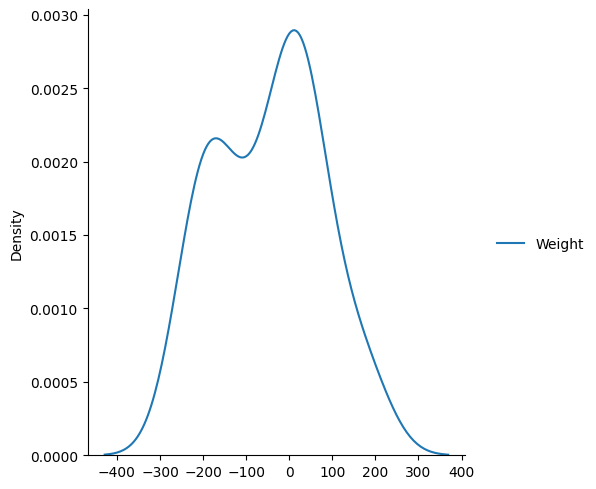

In [67]:
import seaborn as sns
sns.displot(reg_pred-y_test, kind = "kde")

In [68]:
from sklearn.metrics import r2_score

In [69]:
score=r2_score(reg_pred,y_test)

In [70]:
score

0.8720269140304431

In [71]:
joblib_file = "Fish_weight_pred.joblib"
joblib.dump(pred_model,joblib_file)

['Fish_weight_pred.joblib']

In [72]:
model=joblib.load(joblib_file)
model

LinearRegression()

In [73]:
y_pred=model.predict(X_test)

In [74]:
model.score(X_test,y_test)

0.8821430593048696